In [1]:
import pandas as pd
import numpy as np

In [2]:
data= pd.read_csv(r'C:\Users\user\Downloads\IOT-temp.csv')

In [3]:
data.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          97606 non-null  object
 1   room_id/id  97606 non-null  object
 2   noted_date  97606 non-null  object
 3   temp        97606 non-null  int64 
 4   out/in      97606 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.7+ MB


In [5]:
pd.value_counts(data['room_id/id'].unique())

Room Admin    1
dtype: int64

In [7]:
data.drop(['room_id/id'], axis=1, inplace=True)

In [8]:
data.head()

,id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,08-12-2018 09:29,31,In


In [31]:
data['noted_date']= pd.to_datetime(data['noted_date'])
data_new= data.set_index('noted_date')

In [45]:
data_new1 = data_new.groupby(data_new.index).mean()
data_new2 = data_new.groupby([data_new.index, 'out/in']).mean()

<AxesSubplot:xlabel='noted_date'>

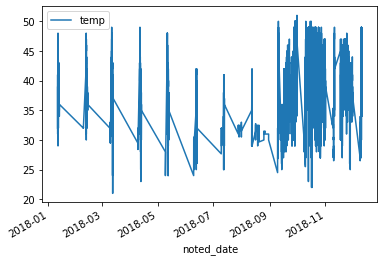

In [46]:
data_new1.plot()

<AxesSubplot:xlabel='noted_date,out/in'>

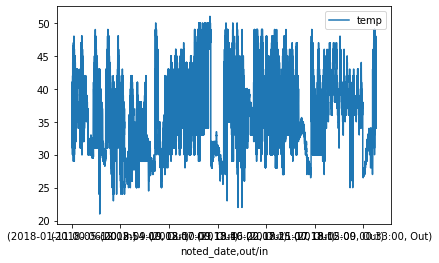

In [47]:
data_new2.plot()

In [48]:
pd.value_counts(data['noted_date'])

2018-12-09 03:09:00    65
2018-09-09 16:24:00    62
2018-09-09 17:31:00    53
2018-11-09 19:42:00    50
2018-09-09 16:08:00    50
                       ..
2018-11-22 21:23:00     1
2018-11-22 21:21:00     1
2018-10-21 05:41:00     1
2018-10-21 05:45:00     1
2018-10-21 21:54:00     1
Name: noted_date, Length: 27920, dtype: int64

In [49]:
data_new2.loc['2018-12-09 03:09:00']

temp
noted_date          out/in           
2018-12-09 03:09:00 In      28.473684
                    Out     28.500000

In [50]:

data_new_in = data_new[data_new['out/in'] == 'In'].groupby(['noted_date']).mean()
data_new_out = data_new[data_new['out/in'] == 'Out'].groupby(['noted_date']).mean()

Text(0, 0.5, 'temperature')

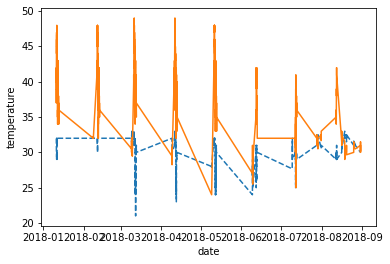

In [51]:
import matplotlib.pyplot as plt
plt.plot(data_new_in.loc[: '2018-9-09 03:09:00'], '--')
plt.plot(data_new_out.loc[: '2018-9-09 03:09:00'], '-')
plt.xlabel('date')
plt.ylabel('temperature')

In [58]:
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler
from scipy.stats import normaltest
data_new1
data_new1_mm = minmax_scale(data_new1)
scaler = StandardScaler()
data_new1_ss = scaler.fit_transform(data_new1_ss)

Text(0.5, 0, 'original')

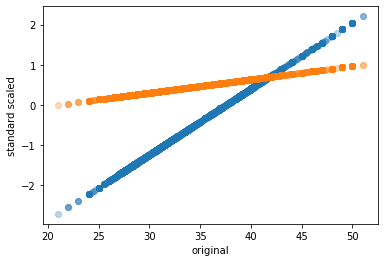

In [59]:
plt.scatter(data_new1, data_new1_ss, alpha = 0.3)
plt.scatter(data_new1, data_new1_mm, alpha = 0.3)

plt.ylabel('standard scaled')
plt.xlabel('original')

Text(0, 0.5, 'temperature')

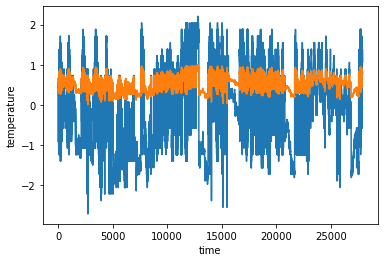

In [60]:
plt.plot(data_new1_ss)
plt.plot(data_new1_mm)
plt.xlabel('time')
plt.ylabel('temperature')

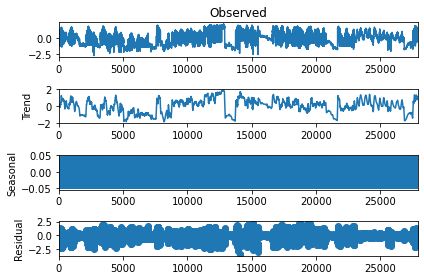

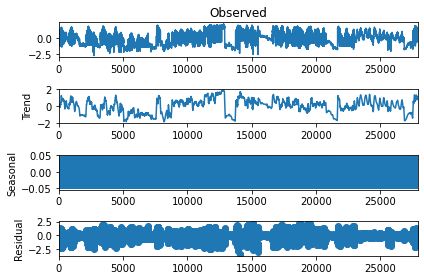

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data_new1_ss, model = 'additive', period = 52)
result.plot()

In [62]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
h = sm.tsa.arima.ARIMA(endog = data_new1_ss, order = (1, 1, 3))
model = h.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                27920
Model:                 ARIMA(1, 1, 3)   Log Likelihood              -25921.069
Date:                Sun, 16 Apr 2023   AIC                          51852.139
Time:                        18:49:28   BIC                          51893.324
Sample:                             0   HQIC                         51865.399
                              - 27920                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1022      0.039     -2.625      0.009      -0.179      -0.026
ma.L1         -0.7371      0.039    -18.978      0.000      -0.813      -0.661
ma.L2         -0.0264      0.033     -0.799      0.424      -0.091       0.038
ma.L3         -0.0933      0.004    -26.357      0.000      -0.100      -0.086
sigma2         0.3749      0.002    171.190      0.000       0.371       0.379
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              9831.78
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.55
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

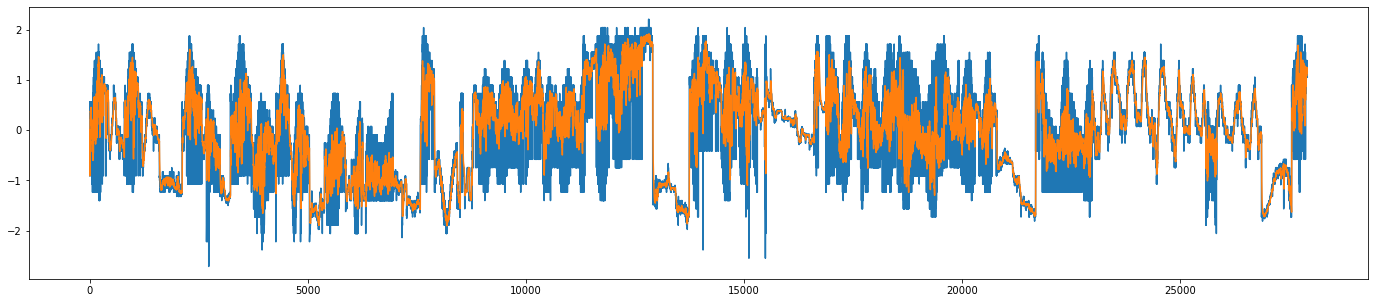

In [63]:
plt.figure(figsize = (24, 5))
plt.plot(data_new1_ss)
plt.plot(model.predict())
plt.show()